<a href="https://colab.research.google.com/github/ehtisham409/code-champ/blob/master/Foker_Planck_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import math, random, cmath
import matplotlib.pyplot as plt
from scipy.special import gamma
import scipy.integrate as integrate

In [ ]:


alpha = 0.3
beta = 0.5
sigma = 0.5

# Limits for x: -2.2 <= x <= 2.2
x_l = -2.0
x_h = 2.0
delta_x = 0.01

# Training set
x_d = np.arange(x_l, x_h, delta_x)
x_d_tensor = tf.convert_to_tensor(x_d.reshape(1, x_d.shape[0], 1), dtype=tf.float32)
# Boundary set
x_b = np.array([x_l, x_h])
x_b_tensor = tf.convert_to_tensor(x_b.reshape(1, x_b.shape[0], 1), dtype=tf.float32)

n_d = x_d.shape[0]
n_b = x_b.shape[0]

# Define the number of neurons in each layer of neural network
n_nodes_hl1 = 20
n_nodes_hl2 = 20
n_nodes_hl3 = 20
n_nodes_hl4 = 20

# Define the number of outputs for neural network
n_classes = 1

# Defining hyperparameters for training
learn_rate = 0.03
epochs = 30000

In [ ]:
# Creating neural network model for function P
tf.keras.backend.set_floatx('float32')
P = tf.keras.Sequential([
                             tf.keras.layers.Dense(n_nodes_hl1,activation='sigmoid',input_shape=(1,1)),
                             tf.keras.layers.Dense(n_nodes_hl2,activation='sigmoid'),
                             tf.keras.layers.Dense(n_nodes_hl3,activation='sigmoid'),
                             tf.keras.layers.Dense(n_nodes_hl4,activation='sigmoid'),
                             tf.keras.layers.Dense(n_classes)
                             ])

P_optimizer = tf.keras.optimizers.Adam(learn_rate)

In [ ]:
# Training of neural network model using DL-FP algorithm
loss_per_iteration = []
for i in range(epochs):
    with tf.GradientTape() as final_tape:

        with tf.GradientTape() as tape:
            tape.watch(x_d_tensor)
            part_1 = ((alpha * x_d_tensor) - (beta * (x_d_tensor ** 3))) * P(x_d_tensor)
        grad_1 = tape.gradient(part_1, x_d_tensor)

        with tf.GradientTape() as tape_2:
            tape_2.watch(x_d_tensor)
            with tf.GradientTape() as tape_1:
                tape_1.watch(x_d_tensor)
                val_1 = P(x_d_tensor)
            pde_1 = tape_1.gradient(val_1, x_d_tensor)
        pde_2 = tape_2.gradient(pde_1, x_d_tensor)


        e1 =  tf.math.reduce_mean(((-grad_1 + (((sigma ** 2) / 2) * pde_2)))**2)

        e2 =  (tf.math.reduce_sum(delta_x * P(x_d_tensor)) - 1) ** 2

        e3 =  tf.math.reduce_mean(P(x_b_tensor) ** 2)

        loss = ( e1) + ( e2)+ ( e3)
        loss_per_iteration.append(loss)
        final_grads = final_tape.gradient(loss, P.trainable_variables)

    P_optimizer.apply_gradients(zip(final_grads, P.trainable_variables))
    if (i + 1) % 10 == 0:
        print("Epoch {:4d} has loss {:6.8f}".format(i + 1, loss))


Epoch   10 has loss 1.86451685
Epoch   20 has loss 1.11826682
Epoch   30 has loss 0.57005399
Epoch   40 has loss 0.39888340
Epoch   50 has loss 0.34450829
Epoch   60 has loss 0.32422882
Epoch   70 has loss 0.31424773
Epoch   80 has loss 0.30879322
Epoch   90 has loss 0.30624878
Epoch  100 has loss 0.30527690
Epoch  110 has loss 0.30454513
Epoch  120 has loss 0.30347389
Epoch  130 has loss 0.30211484
Epoch  140 has loss 0.30046910
Epoch  150 has loss 0.29837400
Epoch  160 has loss 0.29564303
Epoch  170 has loss 0.29197216
Epoch  180 has loss 0.28686449
Epoch  190 has loss 0.28020325
Epoch  200 has loss 0.27158448
Epoch  210 has loss 0.25985795
Epoch  220 has loss 0.24321684
Epoch  230 has loss 0.21929413
Epoch  240 has loss 0.18548128
Epoch  250 has loss 0.14076743
Epoch  260 has loss 0.09042966
Epoch  270 has loss 0.04850158
Epoch  280 has loss 0.02465464
Epoch  290 has loss 0.01533296
Epoch  300 has loss 0.01234052
Epoch  310 has loss 0.01128912
Epoch  320 has loss 0.01077712
Epoch  3

Text(0, 0.5, 'Loss')

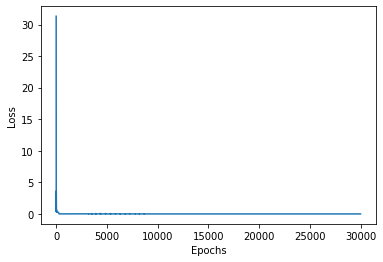

In [ ]:
# Plot of loss per epoch
plt.plot(range(len(loss_per_iteration)), loss_per_iteration, label='Loss per iteration')
plt.xlabel('Epochs')
plt.ylabel('Loss')

In [ ]:
# Saving the model

P.save('Foker_Planck_v1.h5')

In [ ]:
# Actual solution

p_actual = lambda x: np.exp((2*alpha*x**2 - beta*x**4) / (2*(sigma**2)))
result = integrate.quad(p_actual, -2.2, 2.2)[0]
y_real = p_actual(x_d) / result

In [ ]:
np.exp((2*alpha*x_d_tensor[0, :, 0]**2 - beta*x_d_tensor[0, :, 0]**4) / (2*(sigma**2)))

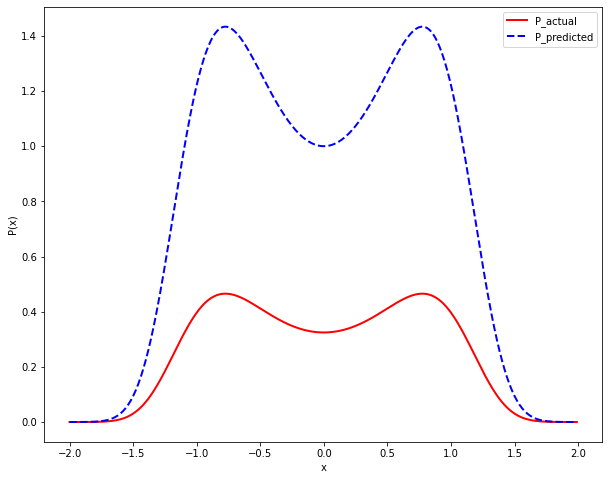

In [ ]:
# Plotting actual and predicted solution

plt.figure(figsize=(10, 8))
plt.plot(x_d, y_real, label='P_actual', color='r',linewidth=2)
#plt.plot(x_d_tensor[0, :, 0], P(x_d_tensor)[0, :, 0], label='P_predicted', linestyle='dashed', color='b', linewidth=2)
plt.plot(x_d_tensor[0, :, 0], np.exp((2*alpha*x_d_tensor[0, :, 0]**2 - beta*x_d_tensor[0, :, 0]**4) / (2*(sigma**2))), label='P_predicted', linestyle='dashed', color='b', linewidth=2)
plt.xlabel('x')
plt.ylabel('P(x)')
plt.legend()
plt.show()